# **Model Training**

## **Data Preprocessing**

In [ ]:
# importing all necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [31]:
# reading data
main_df = pd.read_csv('data.csv')
main_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [32]:
main_df.shape

(381109, 12)

In [33]:
main_df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [34]:
# taking 20% of data for experimentation
df = main_df.iloc[:int(0.2*main_df.shape[0])]

In [35]:
# shape of experimentation data 
df.shape

(76221, 12)

In [36]:
df['Response'].value_counts()

Response
0    66789
1     9432
Name: count, dtype: int64

In [37]:
# info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76221 entries, 0 to 76220
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    76221 non-null  int64  
 1   Gender                76221 non-null  object 
 2   Age                   76221 non-null  int64  
 3   Driving_License       76221 non-null  int64  
 4   Region_Code           76221 non-null  float64
 5   Previously_Insured    76221 non-null  int64  
 6   Vehicle_Age           76221 non-null  object 
 7   Vehicle_Damage        76221 non-null  object 
 8   Annual_Premium        76221 non-null  float64
 9   Policy_Sales_Channel  76221 non-null  float64
 10  Vintage               76221 non-null  int64  
 11  Response              76221 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 7.0+ MB


In [38]:
# removing unwanted columns
columns_to_remove = ['id', 'Driving_License']
df.drop(columns=columns_to_remove, inplace=True)

In [39]:
# unique values in region code
print("There are", df['Region_Code'].nunique(), "unique values of region code")

There are 53 unique values of region code


In [40]:
# reducing categories in region code column 
region_counts = df['Region_Code'].value_counts()
df['Region_Code'] = [i if region_counts[i] >= 6280 else 1.0 for i in df['Region_Code']]

In [41]:
# checkin unique values in Region_Code column
df['Region_Code'].unique()

array([28.,  1.,  8.])

In [42]:
# changing datatype to str
df['Region_Code'] = df['Region_Code'].astype(str)

In [43]:
# reducing categories in region code column
policy_sales_channel_count = df['Policy_Sales_Channel'].value_counts()
df['Policy_Sales_Channel'] = [i if policy_sales_channel_count[i] >= 1360 else 1.0 for i in df['Policy_Sales_Channel']]

In [44]:
# checking unique values in Policy_Sales_Channel column
df['Policy_Sales_Channel'].unique()

array([ 26., 152., 160., 124.,   1., 156., 122.])

In [45]:
# changing datatype to str
df['Policy_Sales_Channel'] =df['Policy_Sales_Channel'].astype(str)

In [46]:
# encoding vehicle age column
df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year':0, '1-2 Year':1, '> 2 Years':2}).astype(int)

In [47]:
# head of dataset
df.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,28.0,0,2,Yes,40454.0,26.0,217,1
1,Male,76,1.0,0,1,No,33536.0,26.0,183,0
2,Male,47,28.0,0,2,Yes,38294.0,26.0,27,1
3,Male,21,1.0,1,0,No,28619.0,152.0,203,0
4,Female,29,1.0,1,0,No,27496.0,152.0,39,0


In [48]:
# splitting data into X and y
X = df.drop(columns='Response')
y = df['Response']

In [49]:
X.shape

(76221, 9)

In [50]:
# splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [51]:
# capping values with maximum values (removing outliers)
X_train['Annual_Premium'] = [i if i < 61000 else 61000 for i in X_train['Annual_Premium']]

In [52]:
ohe_columns = ['Region_Code', 'Policy_Sales_Channel', 'Vehicle_Damage', 'Gender']
mm_columns = ['Age', 'Annual_Premium', 'Vintage', 'Vehicle_Age']

one_hot_encoder = OneHotEncoder(sparse_output=False)
min_max_scaler = MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", one_hot_encoder, ohe_columns),
        ("MinMaxScaler", min_max_scaler, mm_columns)
    ],
    remainder='passthrough'  
)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [53]:
# random under sampling for balancing dataset
nn_under_sampler = RepeatedEditedNearestNeighbours(n_neighbors=4)
X_resampled, y_resampled = nn_under_sampler.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = nn_under_sampler.fit_resample(X_test, y_test)

In [54]:
# printing shape of data
print("Shape of data before resampling:",X_train.shape)
print("Shape of data after resampling:",X_resampled.shape)
y_resampled.value_counts()

Shape of data before resampling: (57165, 19)
Shape of data after resampling: (39209, 19)


Response
0    32034
1     7175
Name: count, dtype: int64

In [55]:
X_resampled

array([[1.        , 0.        , 0.        , ..., 0.07612457, 0.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.39792388, 0.        ,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.69550173, 0.5       ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.11072664, 0.5       ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.1384083 , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.22145329, 0.5       ,
        0.        ]])

In [56]:
# importing all ml models for classifications
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

Logistic Regressor
Accuracy is:  0.96
Classification report is as fallow: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     10646
           1       0.87      0.88      0.88      2257

    accuracy                           0.96     12903
   macro avg       0.92      0.92      0.92     12903
weighted avg       0.96      0.96      0.96     12903



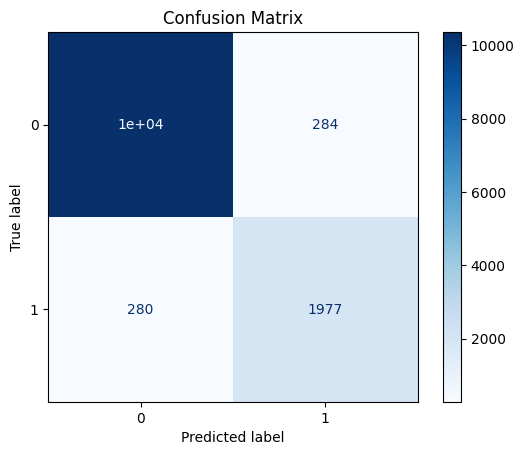

Knearest Neighbour Classifier
Accuracy is:  0.95
Classification report is as fallow: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97     10646
           1       0.83      0.86      0.85      2257

    accuracy                           0.95     12903
   macro avg       0.90      0.91      0.91     12903
weighted avg       0.95      0.95      0.95     12903



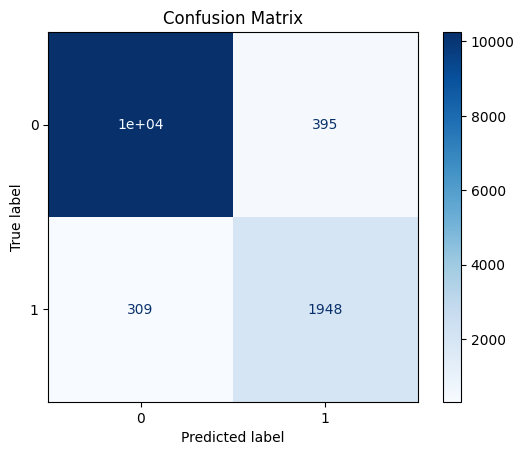

Decision Tree Classifier
Accuracy is:  0.93
Classification report is as fallow: 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96     10646
           1       0.78      0.86      0.82      2257

    accuracy                           0.93     12903
   macro avg       0.87      0.91      0.89     12903
weighted avg       0.94      0.93      0.93     12903



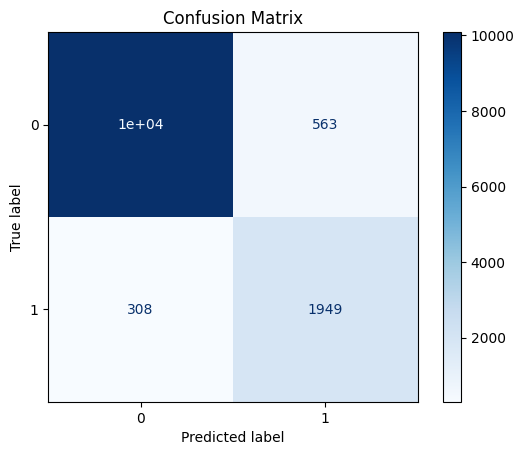

Random Forest Classifier
Accuracy is:  0.95
Classification report is as fallow: 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     10646
           1       0.84      0.90      0.86      2257

    accuracy                           0.95     12903
   macro avg       0.91      0.93      0.92     12903
weighted avg       0.95      0.95      0.95     12903



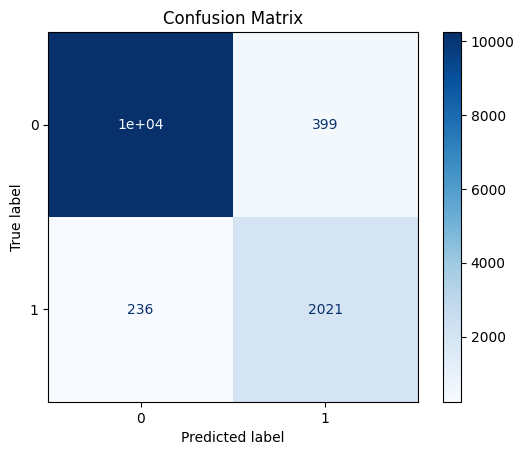

Gradient Boosting Classifier
Accuracy is:  0.96
Classification report is as fallow: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     10646
           1       0.88      0.88      0.88      2257

    accuracy                           0.96     12903
   macro avg       0.93      0.93      0.93     12903
weighted avg       0.96      0.96      0.96     12903



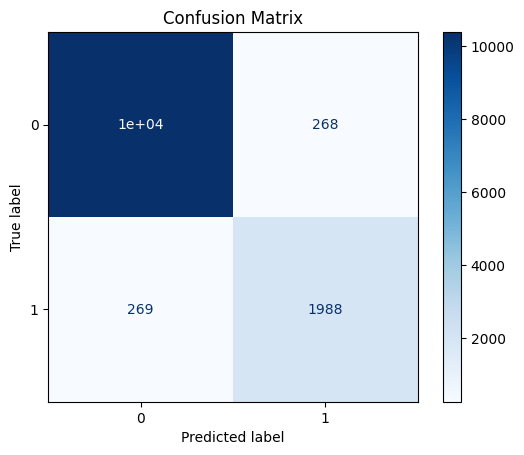

Support Vector Classifier
Accuracy is:  0.95
Classification report is as fallow: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     10646
           1       0.86      0.88      0.87      2257

    accuracy                           0.95     12903
   macro avg       0.92      0.93      0.92     12903
weighted avg       0.96      0.95      0.95     12903



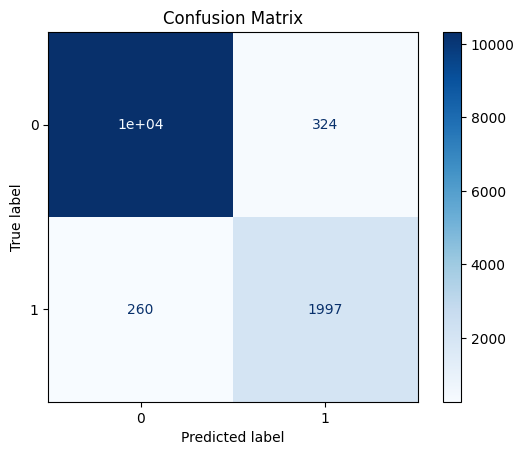

Adaboost Classifier
Accuracy is:  0.95
Classification report is as fallow: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     10646
           1       0.87      0.87      0.87      2257

    accuracy                           0.95     12903
   macro avg       0.92      0.92      0.92     12903
weighted avg       0.95      0.95      0.95     12903



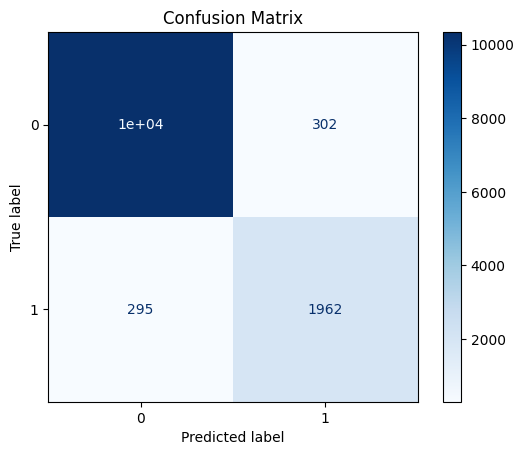

xgb Classifier
Accuracy is:  0.95
Classification report is as fallow: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     10646
           1       0.86      0.89      0.87      2257

    accuracy                           0.95     12903
   macro avg       0.92      0.93      0.92     12903
weighted avg       0.96      0.95      0.95     12903



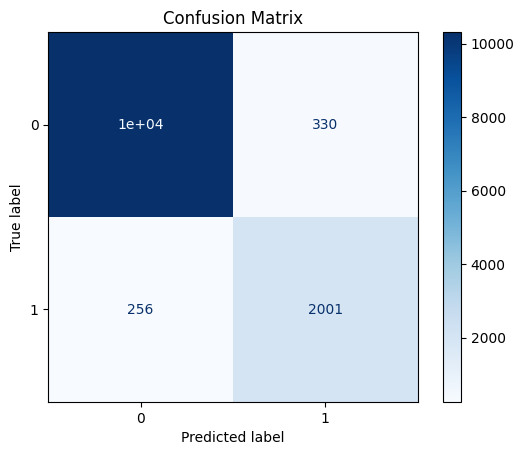

Learning rate set to 0.049353
0:	learn: 0.5734668	total: 122ms	remaining: 2m 2s
1:	learn: 0.4776873	total: 136ms	remaining: 1m 7s
2:	learn: 0.4037650	total: 151ms	remaining: 50.1s
3:	learn: 0.3472322	total: 165ms	remaining: 41.1s
4:	learn: 0.3040618	total: 180ms	remaining: 35.8s
5:	learn: 0.2709828	total: 194ms	remaining: 32.1s
6:	learn: 0.2442913	total: 207ms	remaining: 29.3s
7:	learn: 0.2238623	total: 220ms	remaining: 27.3s
8:	learn: 0.2078299	total: 234ms	remaining: 25.8s
9:	learn: 0.1952108	total: 247ms	remaining: 24.5s
10:	learn: 0.1847641	total: 261ms	remaining: 23.4s
11:	learn: 0.1762151	total: 273ms	remaining: 22.5s
12:	learn: 0.1689516	total: 285ms	remaining: 21.7s
13:	learn: 0.1634597	total: 297ms	remaining: 21s
14:	learn: 0.1586601	total: 309ms	remaining: 20.3s
15:	learn: 0.1542404	total: 322ms	remaining: 19.8s
16:	learn: 0.1504213	total: 334ms	remaining: 19.3s
17:	learn: 0.1471784	total: 346ms	remaining: 18.9s
18:	learn: 0.1445752	total: 359ms	remaining: 18.6s
19:	learn: 0.

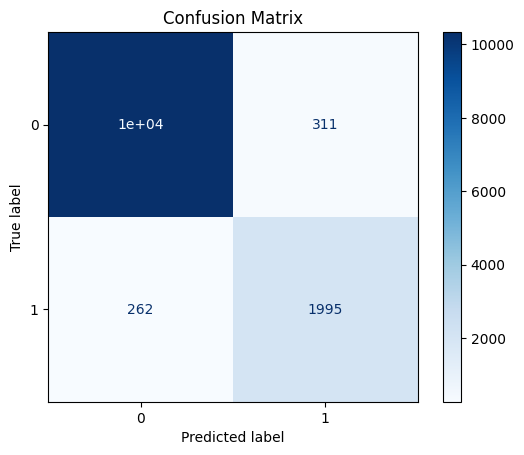

In [57]:
# experimenting with all models
models = {
    'Logistic Regressor': LogisticRegression(),
    'Knearest Neighbour Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Support Vector Classifier':SVC(),
    'Adaboost Classifier': AdaBoostClassifier(),
    'xgb Classifier': XGBClassifier(),
    'catboost Classifier': CatBoostClassifier()
}

# lists to save metrics
models_name = []
acc_score = []
precision = []
recall = []

# training each model and saving metrics
for i in range(len(list(models))):
    # printing model name
    model = list(models.values())[i]
    # training model
    model.fit(X_resampled, y_resampled)

    # making predictions
    y_pred = model.predict(X_test_resampled)

    # metrics
    accuracy = round(accuracy_score(y_test_resampled, y_pred), 2)
    overall_precision = precision_score(y_test_resampled, y_pred)
    overall_recall = recall_score(y_test_resampled, y_pred)

    print(list(models.keys())[i])
    print("Accuracy is: ", accuracy)
    print("Classification report is as fallow: \n", classification_report(y_test_resampled, y_pred))

    # appending metrics to appropriate list
    acc_score.append(accuracy)
    precision.append(overall_precision)
    recall.append(overall_recall)
    models_name.append(list(models.keys())[i])

    # Generate the confusion matrix
    cm = confusion_matrix(y_test_resampled, y_pred)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')  # Use a colormap for better visualization
    plt.title("Confusion Matrix")
    plt.show()
    print('='*100)

In [58]:
# creating dataframe for metrics
metrics_df = pd.DataFrame({'Model Names':models_name, 'Accuracy':acc_score, 
                           'Precision': precision, 'Recall':recall})

metrics_df.sort_values(by='Accuracy', ascending=False)

,Model Names,Accuracy,Precision,Recall
0,Logistic Regressor,0.96,0.874392,0.875942
4,Gradient Boosting Classifier,0.96,0.881206,0.880815
8,catboost Classifier,0.96,0.865134,0.883917
1,Knearest Neighbour Classifier,0.95,0.831413,0.863093
3,Random Forest Classifier,0.95,0.835124,0.895436
5,Support Vector Classifier,0.95,0.860405,0.884803
6,Adaboost Classifier,0.95,0.866608,0.869296
7,xgb Classifier,0.95,0.858430,0.886575
2,Decision Tree Classifier,0.93,0.775876,0.863536


Gradient boosting classifier shows good balance between precision and recall and has low training and inference time so we will go with Gradient Boosting Classifier

In [ ]:
# Hyper parameter tunning for Gradient Boosting Classifier

# Define the classifier
gbc = GradientBoostingClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 4, 5],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 1.0],  # Fraction of samples used for training each base learner
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    estimator=gbc,
    param_grid=param_grid,
    scoring='accuracy',  
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
    verbose=2  # Show process progress
)

# Fit the model on training data
grid_search.fit(X_resampled, y_resampled)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))
